In [1]:
import os
import numpy as np
import pandas as pd


# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight', dpi=300)
    pdf.close()
    return

In [3]:
meta_activity_map_file = "../data/meta_activity_map.csv"
save_dir = "../data/figures/strength_vs_response"
libraries = ["CC", "ATF2", "CTCF", "FOXA1", "LEF1", "SCRT1", "TCF7L2", "16P12_1"]

In [4]:
meta_df = pd.read_csv(meta_activity_map_file)

In [20]:
meta_df.loc[meta_df.chrom_coord.isin(["chr17_80694204_80694704", "chr2_19228797_19229297", "chr16_89995593_89996093"]), [
    "chrom_coord",
    # "CC", "ATF2", "CTCF", "FOXA1", "LEF1", "SCRT1", "TCF7L2", 
    "CC_peak", "ATF2_peak", "CTCF_peak", "FOXA1_peak", "LEF1_peak", "SCRT1_peak", "TCF7L2_peak",
    "ATF2_padj", "CTCF_padj", "FOXA1_padj", "LEF1_padj", "SCRT1_padj", "TCF7L2_padj"
    ]]

,chrom_coord,CC_peak,ATF2_peak,CTCF_peak,FOXA1_peak,LEF1_peak,SCRT1_peak,TCF7L2_peak,ATF2_padj,CTCF_padj,FOXA1_padj,LEF1_padj,SCRT1_padj,TCF7L2_padj
250051,chr16_89995593_89996093,1,1,0,1,1,1,1,4.058274e-13,0.002144,8.842515e-04,1.173576e-01,0.999497,0.077794
251193,chr2_19228797_19229297,1,0,1,1,0,1,1,1.223069e-28,0.848151,3.510500e-04,5.209599e-68,0.001761,0.982852
253211,chr17_80694204_80694704,1,0,1,1,0,1,1,5.960043e-28,0.030596,4.453231e-55,4.337990e-110,0.000011,0.005136


In [6]:
sig_response_atleastone_lib_query = "|".join([f"`{lib}_padj`<0.05" for lib in libraries[1:-1]])
sig_response_df = meta_df.query(sig_response_atleastone_lib_query)

In [7]:
sig_response_df["variance"] = sig_response_df.loc[:, libraries[1:-1]].std(axis=1)

/tmp/ipykernel_1903576/2592778441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_response_df["variance"] = sig_response_df.loc[:, libraries[1:-1]].std(axis=1)


In [8]:
sig_response_df.variance.describe()

count    86483.000000
mean         0.308477
std          0.195120
min          0.031619
25%          0.199926
50%          0.261978
75%          0.347950
max          1.709734
Name: variance, dtype: float64

In [9]:
len(meta_df)

253632

In [10]:
variably_response_df = sig_response_df.loc[sig_response_df.variance>0.261978]
invariably_response_df = sig_response_df.loc[sig_response_df.variance<0.261978]

In [11]:
sig_response_df["variance_level"] = sig_response_df.variance.apply(lambda x: "high" if x>0.261978 else "low")

/tmp/ipykernel_1903576/3805721964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_response_df["variance_level"] = sig_response_df.variance.apply(lambda x: "high" if x>0.261978 else "low")


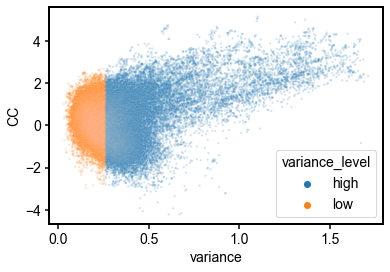

In [19]:
f = sns.scatterplot(data=sig_response_df, x="variance", y="CC", hue="variance_level", s=5, alpha=0.2, rasterized=True)

In [13]:
save_file = "/data5/deepro/starrseq/papers/results/2_categorize_fragments_on_activity/data/figures/cc_activity_vs_response_variance.pdf"

In [17]:
save_pdf(save_file, f.figure)

In [12]:
sig_response_df

,chrom_coord,CC,ATF2,CTCF,FOXA1,LEF1,SCRT1,TCF7L2,16P12_1,CC_peak,...,TCF7L2_pvalue,TCF7L2_padj,16P12_1_baseMean,16P12_1_log2FoldChange,16P12_1_lfcSE,16P12_1_stat,16P12_1_pvalue,16P12_1_padj,variance,variance_level
1,chr19_41997247_41997747,-4.219894,-2.625629,-3.541244,-3.722848,-4.030320,-3.911038,-4.425876,-4.230219,0,...,7.237247e-01,NaN,27.700353,0.037487,0.346560,0.108170,0.913861,NaN,0.609918,high
2,chr18_48106841_48107341,-4.219172,-2.299419,-3.408249,-3.516341,-3.953909,-3.336600,-4.251061,-3.811745,0,...,9.932068e-01,NaN,20.599827,0.372533,0.387871,0.960456,0.336826,NaN,0.668991,high
6,chr18_48106891_48107391,-4.153728,-2.128151,-3.344323,-3.456595,-3.864618,-3.404549,-4.087423,-3.672199,0,...,8.358997e-01,NaN,22.358357,0.450387,0.386235,1.166097,0.243575,NaN,0.679730,high
8,chr20_41578037_41578516,-4.068946,-2.883145,-3.534686,-3.834934,-3.380918,-3.949123,-4.192465,-3.092326,0,...,9.976434e-01,NaN,24.264112,0.992699,0.359579,2.760728,0.005767,NaN,0.466716,high
11,chr18_48106941_48107441,-3.940588,-1.930259,-3.068123,-3.178398,-3.539753,-3.273771,-3.745932,-3.427505,0,...,4.940256e-01,NaN,27.394476,0.490565,0.336926,1.456003,0.145392,NaN,0.634535,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253627,chr8_46617217_46617717,4.934769,2.795126,4.543962,5.647602,5.600322,4.669582,5.529039,4.901181,1,...,7.654607e-10,1.015748e-07,5762.071905,-0.047847,0.101650,-0.470705,0.637851,0.887568,1.094760,high
253628,chr1_233179702_233180202,5.008113,2.933722,4.792427,5.845539,2.965903,5.713423,5.609818,5.282977,1,...,3.630795e-10,5.351766e-08,2900.449149,0.283602,0.092713,3.058933,0.002221,0.040872,1.362590,high
253629,chr1_222455392_222455885,5.044944,2.771727,4.297637,5.411504,5.410107,4.707708,5.773905,4.942738,1,...,1.642461e-13,7.899117e-11,7012.013933,-0.110038,0.102743,-1.071003,0.284168,0.668648,1.098999,high
253630,chr1_222455342_222455842,5.071564,2.807113,4.334105,5.461474,5.431616,4.735181,5.804198,4.979754,0,...,1.474648e-13,7.245404e-11,7312.196716,-0.100073,0.103010,-0.971487,0.331306,0.709149,1.098109,high


In [13]:
sig_response_df.variance.corr(sig_response_df.CC.abs(), method="pearson")

0.5614737437618225

In [14]:
variably_response_df.CC

1        -4.219894
2        -4.219172
6        -4.153728
8        -4.068946
11       -3.940588
            ...   
253627    4.934769
253628    5.008113
253629    5.044944
253630    5.071564
253631    5.147281
Name: CC, Length: 43241, dtype: float64

In [15]:
invariably_response_df.CC

80       -2.966081
126      -2.845608
146      -2.812606
167      -2.773244
168      -2.771008
            ...   
251806    2.524739
251964    2.592311
252055    2.637475
252102    2.657179
252122    2.668270
Name: CC, Length: 43242, dtype: float64

In [17]:
sig_response_df.sort_values("variance", ascending=False)

,chrom_coord,CC,ATF2,CTCF,FOXA1,LEF1,SCRT1,TCF7L2,16P12_1,CC_peak,...,TCF7L2_pvalue,TCF7L2_padj,16P12_1_baseMean,16P12_1_log2FoldChange,16P12_1_lfcSE,16P12_1_stat,16P12_1_pvalue,16P12_1_padj,variance,variance_level
251193,chr2_19228797_19229297,2.340725,-0.247164,2.496678,3.173643,-0.564489,3.297181,2.291146,2.974814,1,...,0.920765,0.982852,3143.868774,0.616209,0.244498,2.520304,0.011725,0.124581,1.709734,high
251544,chr2_19228847_19229347,2.437841,-0.110393,2.595406,3.267259,-0.409278,3.393133,2.392730,3.070791,0,...,0.900023,0.977810,2739.326710,0.611903,0.240819,2.540930,0.011056,0.120041,1.684483,high
250051,chr16_89995593_89996093,2.071070,5.278976,0.228614,3.634606,3.295136,2.115297,3.217337,2.402479,1,...,0.006233,0.077794,698.420648,0.301410,0.430211,0.700609,0.483547,0.812397,1.684355,high
251399,chr2_19228897_19229397,2.397091,-0.148276,2.557024,3.243385,-0.425875,3.364590,2.359639,3.037732,1,...,0.880688,0.973062,2545.380533,0.619043,0.242567,2.552055,0.010709,0.117778,1.683099,high
252888,chr12_88559469_88559959,3.124366,0.667190,3.057888,4.045799,0.212009,3.919400,3.427557,3.530953,0,...,0.001366,0.024249,2992.478701,0.406699,0.102513,3.967290,0.000073,0.003653,1.682365,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220720,chr3_50259451_50259951,0.692899,0.916839,0.956675,0.872424,0.845834,0.868467,0.854399,0.532645,0,...,0.037529,0.258799,352.245887,-0.183740,0.127813,-1.437568,0.150557,0.507080,0.042542,low
203206,chr12_6229302_6229802,0.418853,0.597069,0.603261,0.618496,0.571768,0.523921,0.546161,0.177557,0,...,0.047302,0.295706,421.654369,-0.256092,0.104201,-2.457688,0.013983,0.139092,0.036359,low
69850,chr6_138088758_138089258,-0.705502,-0.519479,-0.519892,-0.472284,-0.491296,-0.562596,-0.466996,-0.627122,0,...,0.023423,0.193721,177.886001,0.050870,0.152247,0.334124,0.738286,NaN,0.035917,low
195723,chr12_6229352_6229852,0.328097,0.448137,0.477044,0.528449,0.440346,0.450382,0.479098,0.080987,0,...,0.026195,0.207690,413.994054,-0.267534,0.107106,-2.497844,0.012495,0.129519,0.032524,low


In [18]:
len(sig_response_df)

86483

In [19]:
meta_df.columns

Index(['chrom_coord', 'CC', 'ATF2', 'CTCF', 'FOXA1', 'LEF1', 'SCRT1', 'TCF7L2',
       '16P12_1', 'CC_peak', 'ATF2_peak', 'CTCF_peak', 'FOXA1_peak',
       'LEF1_peak', 'SCRT1_peak', 'TCF7L2_peak', '16P12_1_peak',
       'ATF2_baseMean', 'ATF2_log2FoldChange', 'ATF2_lfcSE', 'ATF2_stat',
       'ATF2_pvalue', 'ATF2_padj', 'CTCF_baseMean', 'CTCF_log2FoldChange',
       'CTCF_lfcSE', 'CTCF_stat', 'CTCF_pvalue', 'CTCF_padj', 'FOXA1_baseMean',
       'FOXA1_log2FoldChange', 'FOXA1_lfcSE', 'FOXA1_stat', 'FOXA1_pvalue',
       'FOXA1_padj', 'LEF1_baseMean', 'LEF1_log2FoldChange', 'LEF1_lfcSE',
       'LEF1_stat', 'LEF1_pvalue', 'LEF1_padj', 'SCRT1_baseMean',
       'SCRT1_log2FoldChange', 'SCRT1_lfcSE', 'SCRT1_stat', 'SCRT1_pvalue',
       'SCRT1_padj', 'TCF7L2_baseMean', 'TCF7L2_log2FoldChange',
       'TCF7L2_lfcSE', 'TCF7L2_stat', 'TCF7L2_pvalue', 'TCF7L2_padj',
       '16P12_1_baseMean', '16P12_1_log2FoldChange', '16P12_1_lfcSE',
       '16P12_1_stat', '16P12_1_pvalue', '16P12_1_padj'],
 

In [20]:
sig_response_df.sort_values("variance", ascending=False).head(20)

,chrom_coord,CC,ATF2,CTCF,FOXA1,LEF1,SCRT1,TCF7L2,16P12_1,CC_peak,...,TCF7L2_pvalue,TCF7L2_padj,16P12_1_baseMean,16P12_1_log2FoldChange,16P12_1_lfcSE,16P12_1_stat,16P12_1_pvalue,16P12_1_padj,variance,variance_level
251193,chr2_19228797_19229297,2.340725,-0.247164,2.496678,3.173643,-0.564489,3.297181,2.291146,2.974814,1,...,9.207646e-01,0.982852,3143.868774,0.616209,0.244498,2.520304,0.011725,0.124581,1.709734,high
251544,chr2_19228847_19229347,2.437841,-0.110393,2.595406,3.267259,-0.409278,3.393133,2.392730,3.070791,0,...,9.000225e-01,0.977810,2739.326710,0.611903,0.240819,2.540930,0.011056,0.120041,1.684483,high
250051,chr16_89995593_89996093,2.071070,5.278976,0.228614,3.634606,3.295136,2.115297,3.217337,2.402479,1,...,6.232744e-03,0.077794,698.420648,0.301410,0.430211,0.700609,0.483547,0.812397,1.684355,high
251399,chr2_19228897_19229397,2.397091,-0.148276,2.557024,3.243385,-0.425875,3.364590,2.359639,3.037732,1,...,8.806880e-01,0.973062,2545.380533,0.619043,0.242567,2.552055,0.010709,0.117778,1.683099,high
252888,chr12_88559469_88559959,3.124366,0.667190,3.057888,4.045799,0.212009,3.919400,3.427557,3.530953,0,...,1.365546e-03,0.024249,2992.478701,0.406699,0.102513,3.967290,0.000073,0.003653,1.682365,high
250918,chrX_41193379_41193879,2.265519,1.046764,2.101919,3.614414,-0.992265,3.136624,2.507994,2.762189,0,...,1.912042e-02,0.170251,267.787379,0.491333,0.128963,3.809868,0.000139,0.005815,1.671649,high
54278,chr8_6649383_6649883,-0.833327,3.684740,-0.930981,0.055191,0.493632,-0.451612,-0.329890,-0.073870,0,...,1.084362e-03,NaN,126.980981,0.759807,0.176338,4.308807,0.000016,NaN,1.669984,high
251183,chr2_19228747_19229247,2.338165,-0.191521,2.499489,3.166269,-0.467612,3.296655,2.286537,2.974440,0,...,9.331584e-01,0.985847,3186.811703,0.618155,0.244310,2.530206,0.011400,0.122466,1.669343,high
253524,chr1_43152660_43153160,4.086664,2.106588,3.932168,5.046220,0.933070,4.806201,4.564744,4.343406,0,...,5.925864e-08,0.000005,6849.595058,0.241391,0.101141,2.386675,0.017001,0.156550,1.668707,high
250903,chrX_41193329_41193829,2.262521,1.062654,2.082662,3.577495,-1.022962,3.108675,2.486249,2.744092,0,...,1.403506e-02,0.138346,324.725224,0.471429,0.119328,3.950713,0.000078,0.003842,1.667030,high
